# Solving an ODE with a termination condition 

Code is in [`ode.jl`](ode.jl)

* Runge-Kutta method: see `ode_rk4` function
* Termination: see `AbortNegative` type
* Cubic spline: see `CubicSpline` type
* Bisect (and overall problem 1 specific logic): see `find_ode_zero` function.

Analytical solution,

$$
\mathbf{d}t = -\frac{\mathbf{d}(y + 1)}{\sqrt{y + 1}}\\
c - t = 2\sqrt{y + 1}
$$

Given $y(0) = 1$, we have $c = 2\sqrt{2}$. $t_s = 2\sqrt2 - 2$

See [below](#Plot) for the plot of the error. The order of convergence is $4$.

1. Since we use the Runge-Kutta method to solve the differencial equation
    $y_c(t_{k-1})$ and $y_c(t_{k})$ are 4th order accurate.

2. Since $f$ is smooth and differentiable around $y=0$, $y_c'(t_{k-1})$ and
    $y_c'(t_{k})$ are also accurate to the 4th order.

3. The interpolation coefficients are linear combination of these values and
    therefore the 3rd order interpolation is a 4th order accurate approximation of
    the interpolation of the solution function in this region. (i.e. the difference
    between the two 3rd order interpolation at any point in this region is 4th order
    accurate)

4. The 3rd order interpolation of the solution is a 4th order accurate estimation of
    the solution itself so the interpolation we get (the approximate one from R-K
    method) is also a 4th order accurate estimation of the solution.

5. The 4th order accurate (3rd order) interpolation we get is also 4th order accurate
    for estimating the zero of the solution since the derivative of $y$ is non-zero
    at $y=0$.

In summary, we are using a 4th order ODE solver to construct a 4th order accurate
interpolation of the solution which can determine the root of the function to 4th
order and therefore the final result is 4th order accurate.

In [1]:
include("ode.jl")

find_ode_zero (generic function with 1 method)

In [2]:
immutable P1Kernel
end
@inline call(::P1Kernel, t, y) = -sqrt(y + 1)

call (generic function with 1241 methods)

In [3]:
const expected = 2 * √2 - 2

0.8284271247461903

In [4]:
get_errors(hs) = [abs(find_ode_zero(P1Kernel(), 0.0, 1.0, h) - expected) for h in hs]

get_errors (generic function with 1 method)

In [5]:
hs = logspace(-3, -0.4, 10000);
errs = get_errors(hs);

In [6]:
using PyPlot

#### Plot

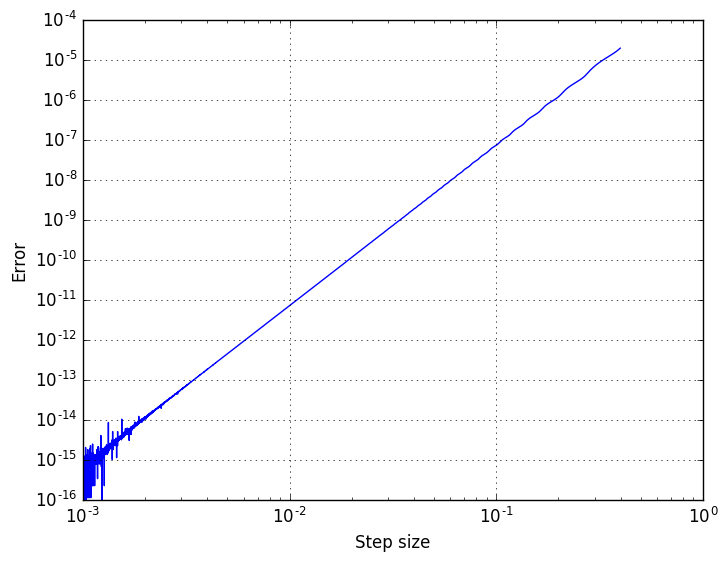

In [7]:
figure()
gca()[:set_xscale]("log", nonposx="clip")
gca()[:set_yscale]("log", nonposx="clip")

plot(hs, errs, "b-", label="BW Limit")
ylabel("Error")
xlabel("Step size")
grid()